In [ ]:
'Importing because of forbidden message:'

import pandas as pd

# Load the dataset from local CSV files
train_df = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_df = pd.read_csv('/content/sample_data/california_housing_test.csv')

# 'Median_house_value' AS the target column
target_column = 'median_house_value'

# Separate features (X) and target (y) for training data
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]

# Separate features (X) and target (y) for testing data
X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

# Concatenate train and test data to create the full X and y, if needed for compatibility
X = pd.concat([X_train, X_test], ignore_index=True)
y = pd.concat([y_train, y_test], ignore_index=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train baseline linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Coefficients
print("Coefficients:", lr.coef_)

# Predict
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Compute MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Baseline Linear Regression MSE")
print("Training MSE:", mse_train)
print("Test MSE:", mse_test)


Coefficients: [-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825121e+00
  1.17648543e+02 -3.84887721e+01  4.54360026e+01  4.05070684e+04]
Baseline Linear Regression MSE
Training MSE: 4824523173.926901
Test MSE: 4867205486.928806


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Define grid of alpha values
alpha_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Ridge Regression with GridSearchCV
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, alpha_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
print("Best alpha for Ridge:", ridge_cv.best_params_['alpha'])

# Lasso Regression with GridSearchCV
lasso = Lasso(max_iter=5000)  # increase max_iter for convergence
lasso_cv = GridSearchCV(lasso, alpha_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
print("Best alpha for Lasso:", lasso_cv.best_params_['alpha'])


Best alpha for Ridge: 100
Best alpha for Lasso: 100


Ridge Coefficients: [-4.21917023e+04 -4.20403460e+04  1.16609440e+03 -8.46308354e+00
  1.16282639e+02 -3.85160226e+01  4.76451058e+01  4.05598233e+04]
Lasso Coefficients: [-4.27622068e+04 -4.25731146e+04  1.15610635e+03 -8.40973374e+00
  1.17077008e+02 -3.85003493e+01  4.63276766e+01  4.05255398e+04]
Ridge MSE - Train: 4824964684.550336 Test: 4866651397.270276
Lasso MSE - Train: 4824593748.343013 Test: 4866868973.981244


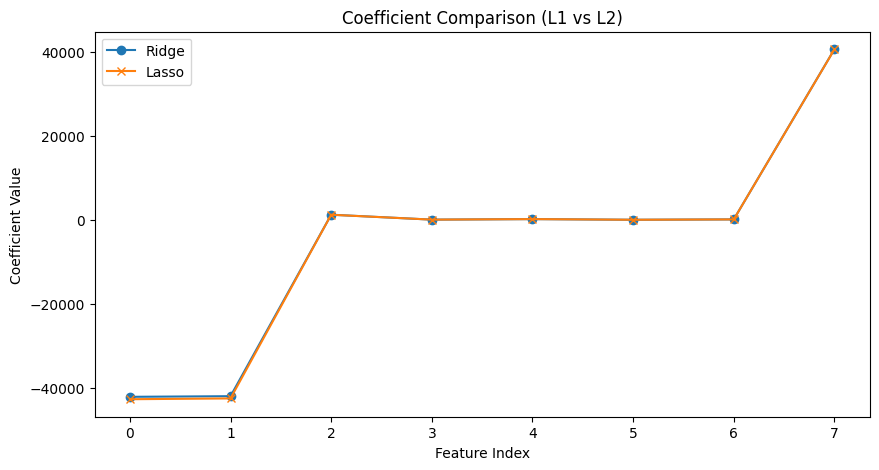

In [ ]:
import matplotlib.pyplot as plt

# Train models with best alpha
ridge_best = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_best.fit(X_train, y_train)

lasso_best = Lasso(alpha=lasso_cv.best_params_['alpha'], max_iter=5000)
lasso_best.fit(X_train, y_train)

# Coefficients comparison
print("Ridge Coefficients:", ridge_best.coef_)
print("Lasso Coefficients:", lasso_best.coef_)

# Compute MSE
mse_train_ridge = mean_squared_error(y_train, ridge_best.predict(X_train))
mse_test_ridge = mean_squared_error(y_test, ridge_best.predict(X_test))

mse_train_lasso = mean_squared_error(y_train, lasso_best.predict(X_train))
mse_test_lasso = mean_squared_error(y_test, lasso_best.predict(X_test))

print("Ridge MSE - Train:", mse_train_ridge, "Test:", mse_test_ridge)
print("Lasso MSE - Train:", mse_train_lasso, "Test:", mse_test_lasso)

# Optional: Visualize coefficients
plt.figure(figsize=(10,5))
plt.plot(ridge_best.coef_, marker='o', label='Ridge')
plt.plot(lasso_best.coef_, marker='x', label='Lasso')
plt.title("Coefficient Comparison (L1 vs L2)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Baseline Logistic Regression
lr = LogisticRegression(max_iter=5000)  # increase max_iter to ensure convergence
lr.fit(X_train, y_train)

# Coefficients
print("Baseline Coefficients:", lr.coef_)

# Accuracy
train_acc = accuracy_score(y_train, lr.predict(X_train))
test_acc = accuracy_score(y_test, lr.predict(X_test))
print("Baseline Accuracy - Train:", train_acc, "Test:", test_acc)


Baseline Coefficients: [[ 1.0274368   0.22145051 -0.36213488  0.0254667  -0.15623532 -0.23771256
  -0.53255786 -0.28369224 -0.22668189 -0.03649446 -0.09710208  1.3705667
  -0.18140942 -0.08719575 -0.02245523  0.04736092 -0.04294784 -0.03240188
  -0.03473732  0.01160522  0.11165329 -0.50887722 -0.01555395 -0.016857
  -0.30773117 -0.77270908 -1.42859535 -0.51092923 -0.74689363 -0.10094404]]
Baseline Accuracy - Train: 0.9582417582417583 Test: 0.956140350877193


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # required for l1 penalty
}

# GridSearchCV
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Hyperparameters:", grid.best_params_)

# Evaluate on test set
best_model = grid.best_estimator_
test_acc_best = accuracy_score(y_test, best_model.predict(X_test))
print("Test Accuracy with Best Hyperparameters:", test_acc_best)


Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy with Best Hyperparameters: 0.9824561403508771


L1 Coefficients: [[ 7.53530118e-01 -1.07850913e-01  9.40796451e-02 -2.09331005e-03
   0.00000000e+00  4.73193556e+01 -1.16561397e+01 -1.36291001e+02
   1.97688055e+01  0.00000000e+00  0.00000000e+00  1.72814178e+00
   0.00000000e+00 -1.97663245e-01  0.00000000e+00  0.00000000e+00
   4.99439560e+01  0.00000000e+00  1.87470740e+01  0.00000000e+00
   2.14850336e-01 -4.38803703e-01  5.61123319e-02 -2.10129873e-02
  -2.17274792e+01  8.01451642e+00 -1.46627404e+01 -2.52311622e+01
  -2.53529403e+01  0.00000000e+00]]
L2 Coefficients: [[ 5.40272741  0.26573732 -0.52651203 -0.02095479 -2.29922151 -0.2169419
  -3.56980218 -5.0110607  -2.26418385  0.36762747 -0.58036525  3.84169255
  -0.63875637 -0.10714305 -0.40591246  3.57237002  4.36577514 -0.26636925
   0.39354765  0.62630698 -0.20718582 -0.68999884  0.17661962 -0.01813087
  -4.67716843 -0.0140846  -4.46493229 -7.61271125 -6.83571871  0.57463274]]
L1 Accuracy - Train: 0.989010989010989 Test: 0.9824561403508771
L2 Accuracy - Train: 0.9692307692

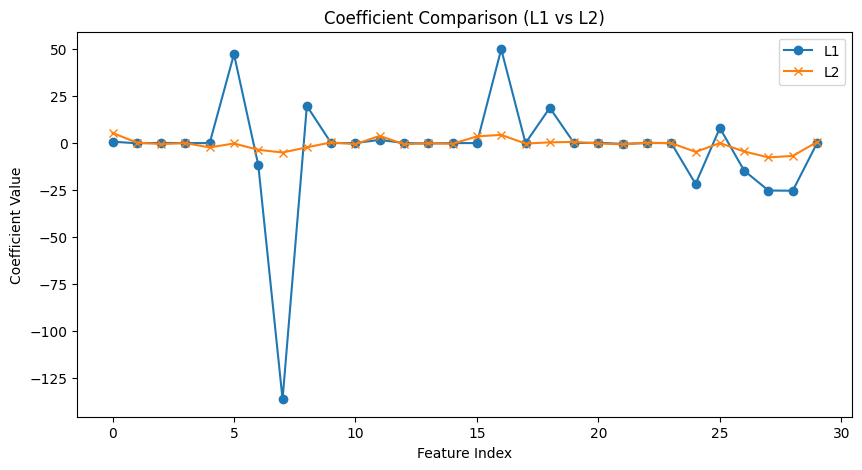

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Train L1 and L2 models with optimal C
C_opt = grid.best_params_['C']

# L1 model
lr_l1 = LogisticRegression(C=C_opt, penalty='l1', solver='liblinear', max_iter=5000)
lr_l1.fit(X_train, y_train)

# L2 model
lr_l2 = LogisticRegression(C=C_opt, penalty='l2', solver='liblinear', max_iter=5000)
lr_l2.fit(X_train, y_train)

# Coefficients
print("L1 Coefficients:", lr_l1.coef_)
print("L2 Coefficients:", lr_l2.coef_)

# Accuracy
train_acc_l1 = accuracy_score(y_train, lr_l1.predict(X_train))
test_acc_l1 = accuracy_score(y_test, lr_l1.predict(X_test))

train_acc_l2 = accuracy_score(y_train, lr_l2.predict(X_train))
test_acc_l2 = accuracy_score(y_test, lr_l2.predict(X_test))

print("L1 Accuracy - Train:", train_acc_l1, "Test:", test_acc_l1)
print("L2 Accuracy - Train:", train_acc_l2, "Test:", test_acc_l2)

# Optional: Visualize coefficients
plt.figure(figsize=(10,5))
plt.plot(lr_l1.coef_.flatten(), marker='o', label='L1')
plt.plot(lr_l2.coef_.flatten(), marker='x', label='L2')
plt.title("Coefficient Comparison (L1 vs L2)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()
